# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 150%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Emotion Recognition Project</p>

<blockquote style="
    margin-right: auto;
    margin-left: auto;
    background-color:#222;
    padding: 15px;
    border-radius: 8px;
    border-left: none;
">
<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>Some important characteristics of the dataset:</b> 📜
</p>

<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-bottom: 20px;
">
    <li>The target variable, emotion, is integer encoded with 7 possible label values. You can find descriptions of the label values in the Data tab of the competition.</li>
    <li>The metric used for the contest is classification accuracy.</li>
    <li>There are 28,709 training images.</li>
    <li>The images are grayscale with a resolution of 48x48.</li>
    <li>Since the images are relatively small and in grayscale, the pixel values for images in the training are stored in a single text file rather than as individual images. The test data is provided in a similar way.</li>
</ul>

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color:#f2f2f0;
">
    <b>Task</b> 🕵
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:
</p>

| categories  | emotion  |
|:---:|:---|
| 0  | Angry  |
| 1  |  Disgust |
| 2  |  Fear |
| 3  |  Happy |
| 4  |  Sad |
| 5  |  Surprise |
| 6  | Neutral |

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>See More Here</b> 📈
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    <a href="https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/overview" style="color: 	#00BFFF;"><b>Facial Emotion Recognition Dataset</b></a>
</p>

</blockquote>

In [ ]:
pip install torchsummary colorama concrete-ml

  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0
    Uninstalling torch-2.3.0:
      Successfully uninstalled torch-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.29 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pydantic-core 2.18.1 requires typing-exten

In [ ]:
pip install --upgrade torch torchvision torchaudio

  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl (779.1 MB)
  Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
concrete-ml 1.5.0 requires torch==1.13.1, but you have torch 2.3.0 which is incompatible.
concrete-ml 1.5.0 requires typing-extensions==4.5.0, but you have

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms
import torchvision

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from colorama import Fore, Style

CLR = (Fore.BLACK) if False else (Style.BRIGHT + Fore.WHITE)
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN


# Matplotlib & Seaborn settings.
FONT_COLOR = "#000"
BACKGROUND_COLOR = "#F6F5F5"
DF_CMAP = sns.light_palette("#252131", as_cmap=True)
MY_RC = {
    "axes.labelcolor": FONT_COLOR,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 7,
    "xtick.color": FONT_COLOR,
    "ytick.labelsize": 7,
    "ytick.color": FONT_COLOR,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.facecolor": BACKGROUND_COLOR,
    "figure.edgecolor": BACKGROUND_COLOR,
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 14,
    "font.family": "Serif",
    "text.color": FONT_COLOR,
}

sns.color_palette("hls", 8)
sns.set_theme(rc=MY_RC)

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto;
    margin-left: auto;
    background-color:#222;
    padding: 15px;
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px;
    margin-bottom: 4px;
">
    <li>In this section, we'll look over the dataset in a general manner.</li>
    <li>Later, we will split the dataset into training, validation, and test sets.</li>
</ul>
</blockquote>


In [2]:
data = pd.read_csv(
        "icml_face_data.csv"
    )

data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [4]:
data.isnull().sum()

emotion    0
 Usage     0
 pixels    0
dtype: int64

In [5]:
data[" Usage"].value_counts()

 Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto;
    margin-left: auto;
    background-color:#222;
    padding: 15px;
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px;
    margin-bottom: 4px;
">
    <li>This dictionary maps numerical labels to corresponding emotion categories for classification tasks.</li>
    <li>In Graphs we see, that `Disgust` emotion has small percentage of data</li>
    <li>In <code>prepare_data()</code> we split data into image and label tensors</li>
</ul>
</blockquote>


In [6]:
emotions = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral",
}
class_percentages = {}
num_labels = 7

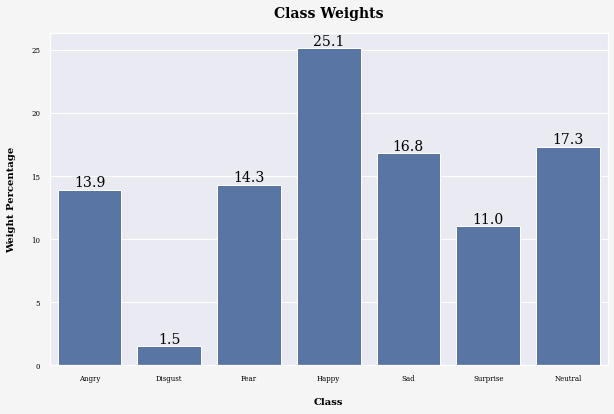

In [7]:
class_weight = dict(
    zip(
        emotions.values(),
        round(
            (
                (
                    data[data[" Usage"] == "Training"]["emotion"].value_counts()
                ).sort_index()
            )
            / len(data[data[" Usage"] == "Training"]["emotion"])
            * 100,
            1,
        ),
    )
)


class_weight_df = pd.DataFrame(list(class_weight.items()), columns=["Class", "Weight"])


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Class", y="Weight", data=class_weight_df)

for index, row in class_weight_df.iterrows():
    barplot.text(
        index, row.Weight, round(row.Weight, 1), color="black", ha="center", va="bottom"
    )

plt.ylabel("Weight Percentage")
plt.title("Class Weights")

plt.show()

In [8]:
def prepare_data(data):
    """Prepare data for modeling
    input: data frame with labels und pixel data
    output: image and label tensors"""

    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data["emotion"])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, " pixels"], dtype=int, sep=" ")
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    image_array = torch.from_numpy(image_array)
    image_label = torch.from_numpy(image_label)

    return image_array, image_label

In [9]:
df_train_array, df_train_label = prepare_data(
    data[data[" Usage"] == "Training"]
)  # modified train set
df_val_array, df_val_label = prepare_data(data[data[" Usage"] == "PublicTest"])
df_test_array, df_test_label = prepare_data(data[data[" Usage"] == "PrivateTest"])


print(f"{RED}Train:", f"{CLR}{df_train_array.shape}", f"{df_train_label.shape}")
print(f"{RED}Validation:", f"{CLR}{df_val_array.shape}", f"{df_val_label.shape}")
print(f"{RED}Test:", f"{CLR}{df_test_array.shape}", f"{df_test_label.shape}")

Train: torch.Size([28709, 48, 48]) torch.Size([28709])
Validation: torch.Size([3589, 48, 48]) torch.Size([3589])
Test: torch.Size([3589, 48, 48]) torch.Size([3589])


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto;
    margin-left: auto;
    background-color:#222;
    padding: 15px;
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px;
    margin-bottom: 4px;
">
    <li>This code snippet prepares training, validation, and test image datasets for a machine learning model using PyTorch. It reshapes the datasets into a format suitable for a convolutional neural network (with 1 channel and 48x48 pixel images).</li>
    <li>Converts the data type to torch.float32, and normalizes the pixel values to the range [0, 1] by dividing by 255.</li>
    <li>Encoding of the target value</li>
</ul>
</blockquote>


In [10]:
train_images = torch.tensor(df_train_array, dtype=torch.float32).view(-1, 1, 48, 48) / 255
val_images = torch.tensor(df_val_array, dtype=torch.float32).view(-1, 1, 48, 48) / 255
test_images = torch.tensor(df_test_array, dtype=torch.float32).view(-1, 1, 48, 48) / 255

<ipython-input-10-1f5a4b76f6a6>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_images = torch.tensor(df_train_array, dtype=torch.float32).view(-1, 1, 48, 48) / 255
<ipython-input-10-1f5a4b76f6a6>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_images = torch.tensor(df_val_array, dtype=torch.float32).view(-1, 1, 48, 48) / 255
<ipython-input-10-1f5a4b76f6a6>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_images = torch.tensor(df_test_array, dtype=torch.float32).view(-1, 1, 48, 48) / 255


In [11]:
def to_categorical_torch(y, num_classes):
    return torch.eye(num_classes)[y]


train_labels = to_categorical_torch(df_train_label, 7)
val_labels = to_categorical_torch(df_val_label, 7)
test_labels = to_categorical_torch(df_test_label, 7)
train_dataset = TensorDataset(train_images, train_labels)  # Assuming you have train_labels
val_dataset = TensorDataset(val_images, val_labels)         # Assuming you have val_labels
test_dataset = TensorDataset(test_images, test_labels)


train_loader = DataLoader(train_images, batch_size=64, shuffle=True)  # Adjust batch size based on your RAM capacity
val_loader = DataLoader(val_images, batch_size=64, shuffle=False)
test_loader = DataLoader(test_images, batch_size=64, shuffle=False)

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto;
    margin-left: auto;
    background-color:#222;
    padding: 15px;
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px;
    margin-bottom: 4px;
">
    <li style='padding-bottom: 10px;'><code>plot_examples():</code> Plots 5 example images for a specified emotion label.</li>
    <li style='padding-bottom: 10px;'><code>plot_all_emotions():</code> Similar in purpose to plot_examples but instead plots one example for each of the 7 emotions in a single row.</li>
    <li style='padding-bottom: 10px;'><code>plot_image_and_emotion():</code> This function plots a specific test image alongside a bar chart comparing the predicted emotion probabilities against the actual label. It's useful for evaluating the model's performance on individual samples by visually comparing the prediction against the truth.
    </li>
    <li style='padding-bottom: 10px;'><code>plot_compare_distributions():</code> Compares the emotion label distributions between two different arrays (e.g., predicted vs. actual labels) through bar charts. It calculates the distribution of each emotion within the provided arrays and visualizes them side by side for comparison. This is particularly useful for analyzing the model's prediction bias or skewness towards certain emotions.
    </li>
</ul>
</blockquote>


In [12]:
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data["emotion"] == label].index[i]
        axs[i].imshow(train_images[idx][:, :, 0], cmap="gray")
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])


def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(16, 8))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data["emotion"] == i].index[i]
        axs[i].imshow(train_images[idx][0][:, :], cmap="gray")
        axs[i].set_title(emotions[train_labels[idx].argmax().item()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])


def plot_image_and_emotion(
    test_image_array, test_image_label, pred_test_labels, image_number
):
    """Function to plot the image and compare the prediction results with the label"""

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

    bar_label = emotions.values()

    axs[0].imshow(test_image_array[image_number], "gray")
    axs[0].set_title(emotions[test_image_label[image_number]])

    axs[1].bar(bar_label, pred_test_labels[image_number], color="orange", alpha=0.7)
    axs[1].grid()

    plt.show()


def plot_compare_distributions(array1, array2, title1="", title2=""):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1["emotion"] = array1.argmax(axis=1)
    df_array2["emotion"] = array2.argmax(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()

    y = df_array1["emotion"].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color="green")
    axs[0].set_title(title1)
    axs[0].grid()

    y = df_array2["emotion"].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()

    plt.show()

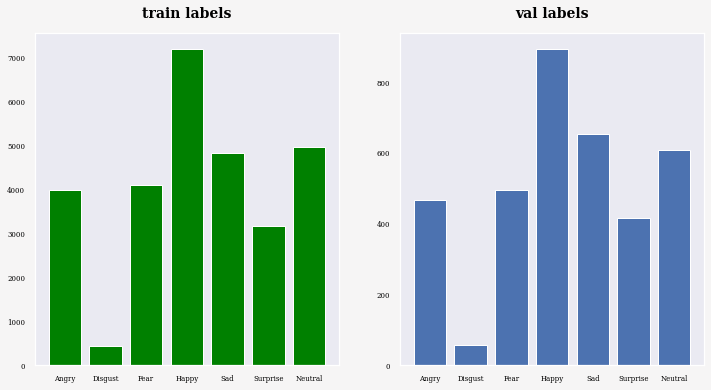

In [13]:
plot_compare_distributions(
    train_labels, val_labels, title1="train labels", title2="val labels"
)

# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 125%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Model Selection</p>

In [14]:
class ConvNet(nn.Module):
    def __init__(self):
        super(GradualNet, self).__init__()
        # Start with the first simple layer
        self.fc = nn.Linear(2304, 7)  # Simple linear layer

    def forward(self, x):
        x = x.view(-1, 2304)  # Flatten the image
        return self.fc(x)

In [15]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)


if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: {device}")
    print(torch.cuda.get_device_name(0))

elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: {device}")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
Running on the CPU


In [17]:
import torch
import torch.nn as nn
from concrete.ml.torch.compile import compile_torch_model

class GradualNet(nn.Module):
    def __init__(self):
        super(GradualNet, self).__init__()
        # Start with the first simple layer
        self.fc = nn.Linear(2304, 7)  # Simple linear layer

    def forward(self, x):
        x = x.view(-1, 2304)  # Flatten the image
        return self.fc(x)

# Instantiate and test incrementally
model = GradualNet().to('cpu')
dummy_input = torch.randn(1,1, 48, 48)

# Add layers one by one, testing each time
# Example: Adding a convolutional layer
model.add_module('conv1', nn.Conv2d(1, 16, 3, padding=1))
# You would need to adjust the forward pass accordingly here

# Test and compile at each step
try:
    output = model(dummy_input)
    print("Model output shape after adding a layer:", output.shape)
    q_gradual_module = compile_torch_model(model, train_images, rounding_threshold_bits=6, p_error=0.1)
    print("Model compilation successful after addition")
except RuntimeError as e:
    print("Compilation failed after adding a layer:", e)


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Model output shape after adding a layer: torch.Size([1, 7])
Model compilation successful after addition


### Device configuration


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto;
    margin-left: auto;
    background-color:#222;
    padding: 15px;
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px;
    margin-bottom: 4px;
">
    <li>The <code>calculate_weights()</code> function is designed for training and validating a PyTorch model across multiple epochs, with functionality to handle both training and validation phases within each epoch. It also supports dynamic reporting of performance metrics (accuracy and loss) and the capability to save the best model based on validation accuracy. </li>
    <li>The <code>plot_losses()</code> function visualizes the evolution of validation loss across training epochs for various batch sizes, allowing for the analysis of how different batch sizes impact model training effectiveness. By plotting loss against epochs for a specific learning rate, it provides a clear visual comparison and understanding of the training dynamics. </li>
    <li>The <code>plot_accuracy()</code> function provides a graphical representation of how validation accuracy evolves through the epochs under varying batch sizes, illustrating the effect of batch size on model accuracy during training. By correlating accuracy trends with different batch sizes, it facilitates a comprehensive analysis of training outcomes at a specified learning rate, enhancing the interpretability of model performance over time. </li>
    <li>The <code>tuning_model()</code> function systematically explores a combination of hyperparameters, namely learning rates and batch sizes, to train and evaluate a neural network model, aiming to identify configurations that optimize its performance in terms of loss and accuracy. Through iterative training sessions, each followed by performance visualization, this function aids in understanding the impact of these hyperparameters on model behavior, guiding the selection of optimal training settings for enhanced model accuracy and efficiency.</li>
</ul>
</blockquote>


In [21]:
from tqdm import tqdm

def test_with_concrete(quantized_module, test_loader, use_sim):
    """Test a neural network that is quantized and compiled with Concrete ML."""
    all_y_pred = []

    fhe_mode = "simulate" if use_sim else "execute"

    for batch in tqdm(test_loader, desc="Testing"):
        data = batch
        if isinstance(batch, (list, tuple)) and len(batch) == 2:
            data = batch[0]  # Handles cases where data and targets are returned

        if isinstance(data, torch.Tensor):
            data = data.numpy()  # Ensure conversion to numpy for compatibility with FHE

        y_pred = quantized_module.forward(data, fhe=fhe_mode)
        y_pred = np.argmax(y_pred, axis=1)  # Assuming classification task
        all_y_pred.extend(y_pred)

    return np.array(all_y_pred)


In [29]:
q_gradual_module.fhe_circuit.keygen()

# Transforming data into PyTorch tensors and setting up DataLoader

# Time the test
t = time.time()
accuracy_test = test_with_concrete(
    q_gradual_module,
    test_loader,
    use_sim=False  # Ensure your model and system support running without simulation
)

if isinstance(accuracy_test, np.ndarray):
    accuracy_test = accuracy_test.mean()  # Ensure it's a scalar

elapsed_time = time.time() - t

if isinstance(elapsed_time, np.ndarray):
    elapsed_time = elapsed_time.mean()  # Aggregate if it's an array

time_per_inference = elapsed_time / len(test_images)  # Assuming test_images is the correct reference

Testing: 100%|██████████| 57/57 [41:28<00:00, 43.65s/it]


In [41]:
accuracy_percentage = accuracy_test
print(
    f"Time per inference in FHE: {time_per_inference:.2f} s, "
    f"with {accuracy_percentage:.2f}% accuracy"
)

Time per inference in FHE: 0.69 s, with 4.24% accuracy
